In [1]:
using Turing, Distributions
using PyPlot, PyCall

INFO: Precompiling module PyPlot.
/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);
K = 3;

In [3]:
@model BayesHmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Dual, K)
    T = Array{Array}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

[Turing]: Assume - `T` is a parameter
[Turing]: Assume - `m` is a parameter
[Turing]: Assume - `s` is a parameter
[Turing]: Observe - `y` is an observation


BayesHmm (generic function with 1 method)

In [5]:
g = Gibbs(300, HMC(1, 0.2, 5, :m, :T), PG(50, 1, :s))
s = sample(BayesHmm(y), g);

[Gibbs]: Finshed within 48.6394100189209 seconds


In [6]:
describe(s)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
           Mean                SD                       Naive SE             MCSE        ESS   
   s[9] 2.99000000 0.099664990683253615322279 0.0057541609199758024864590 0.01000000  99.331104
   s[5] 2.00000000 0.000000000000000000000000 0.0000000000000000000000000 0.00000000 300.000000
   m[1] 1.00345960 0.000000000000002001740463 0.0000000000000001155705395 0.00000000 300.000000
   s[4] 1.00000000 0.000000000000000000000000 0.0000000000000000000000000 0.00000000 300.000000
   s[8] 2.99000000 0.099664990683253615322279 0.0057541609199758024864590 0.01000000  99.331104
T[2][1] 0.24451570 0.000000000000000250217558 0.0000000000000000144463174 0.00000000 300.000000
T[2][2] 0.66646516 0.000000000000001112078035 0.0000000000000000642058553 0.00000000 300.000000
T[2][3] 0.08901915 0.000000000000000069504877 0.0000000000000000040128660 0.00000000 300.000000
   s[7] 2.00000000 0.0000000

In [8]:
# m = c[:m][111];
# s = c[:s][111];
# PyPlot.plot(y, linestyle="None", marker="+", color = "r")
# PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")

LoadError: KeyError: key :m not found

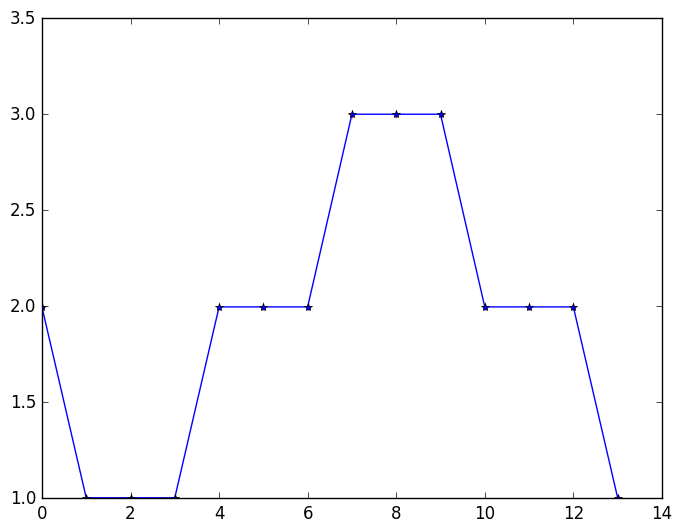

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f019f437290>

In [14]:
# Unable to get :m directly now
ms = []
for i = 1:14
    s111 = s[Symbol("s[$i]")][111]
    m111 = s[Symbol("m[$s111]")][111]
    push!(ms, m111)
end

PyPlot.plot(y, linestyle="None", marker="+", color = "r")
PyPlot.plot(ms, linestyle="-", marker="*", color = "b")